In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

train_whole_pd = pd.read_csv('train.csv')

# get last 10% of data as test data
test_data = train_whole_pd.iloc[int(train_whole_pd.shape[0] * 0.9):, :]

In [38]:
def vote_perceptron_report_edition(n):

    # get first n% of data as train data
    temp_train_data = train_whole_pd.iloc[:int(train_whole_pd.shape[0] * 0.9), :]
    train_data = temp_train_data.iloc[:int(temp_train_data.shape[0] * n), :]

    # Prepare data
    np_train_data = np.array(train_data)
    x_train = np_train_data[:, 1:-1]
    y_train = np_train_data[:, -1] * 2 - 1 # shift label distribution

    np_test_data = np.array(test_data)
    x_test = np_test_data[:, 1:-1] # Exclusively for the report edition

    # Train
    k = 1
    c = [0]
    w = [np.zeros(x_train.shape[1])]
    t = 0
    T = 15 # number of rounds
    while t <= T:
        for i in range(x_train.shape[0]):
            if y_train[i] * np.dot(w[k-1], x_train[i]) <= 0:
                w.append(w[k-1] + y_train[i] * x_train[i])
                c.append(1)
                k += 1
            else:
                c[k-1] += 1
        t += 1

    # Predict
    predictions = []
    for i in range(x_test.shape[0]):
        pred = 0
        for j in range(k):
            pred += c[j] * np.sign(np.dot(w[j], x_test[i]))
        predictions.append(((np.sign(pred) + 1) / 2).astype(int)) # shift label distribution back

    # submit = pd.DataFrame({'id': test_data['id'], 'label': predictions})
    # submit.to_csv("test_ans.csv", index=False)

    return predictions

In [46]:
train_size = np.array([0.01, 0.02, 0.05, 0.1, 0.2, 0.3, 0.5, 0.7, 0.9, 1])
accuracy = []
for i in train_size:
    accuracy.append(np.mean(vote_perceptron_report_edition(i) == test_data['label']))
print(accuracy)

[0.76, 0.82, 0.94, 0.92, 0.94, 0.96, 0.98, 0.98, 0.96, 0.98]


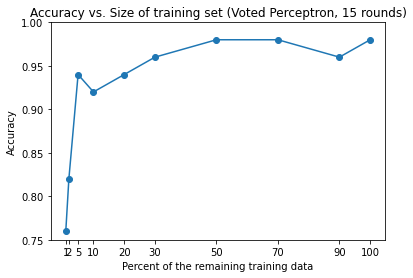

In [47]:
# Plot the accuracy vs. the size of the training set
plt.plot(train_size * 100, accuracy, 'o-')
plt.ylim(0.75, 1)
plt.xticks(train_size * 100)
plt.xlabel('Percent of the remaining training data')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Size of training set (Voted Perceptron, 15 rounds)')
# Export plot as .png
plt.savefig('voted_perceptron.jpg')